# Machine Learning Unit - Assignment 2

<h3>Unsupervised Learning</h3>

<h4>Chris Rickard</h4>

<p>In this notebook I take a dataset of mall customers and apply clustering techniques to segment the customers into groups based on their spending habits. I apply the below techniques: </p> 

<ul>
<li> K-Means Clustering </li>
<li> Silhouette Method </li>
<li> DBSCAN </li>
<li> Knee/Elbow Method </li>
<li> Hierarchical Clustering </li>
<li> Dendrogram </li>
</ul>

## Task 1 – Data Loading and data exploration

### Data Loading

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
customers = pd.read_csv('Dataset/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

Performing an exploratory analysis on the dataset including descriptive statistics and distribution, correlation between parameters, Dimension reduction, etc. Please note that you need to support your analysis with appropriate visualisations.

In [5]:
# Descriptive statistics of the dataset
customers.drop(['CustomerID'], axis = 1).describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Gender Count
customers['Gender'].describe(include=['category'])

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

### Distribution of the dataset

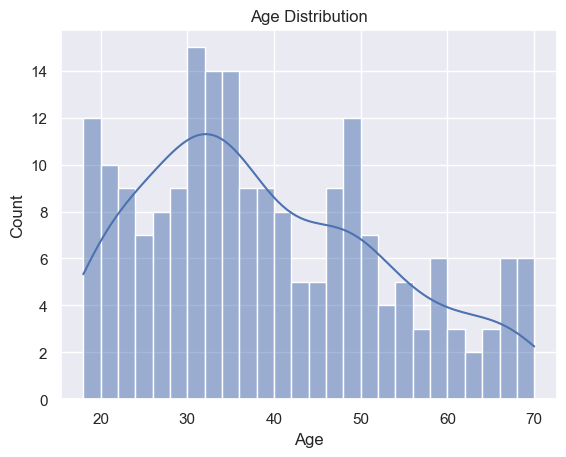

In [7]:
# Age distribution
sns.set(style="darkgrid")
sns.histplot(customers['Age'], bins = 26, kde=True)
plt.title('Age Distribution')
plt.show()

The age distribution of the dataset has a positive skew. The majority of the customers are between 20 and 40 years old.

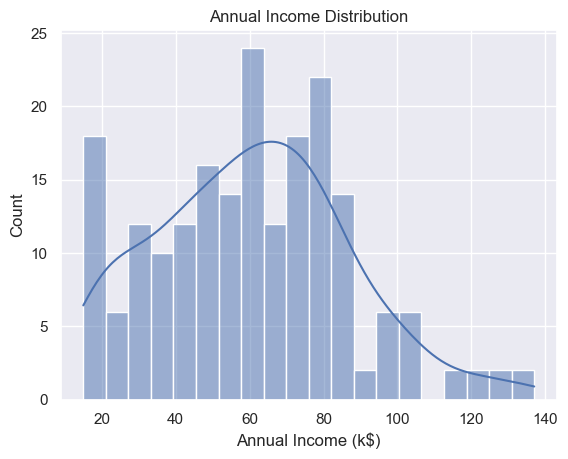

In [8]:
# Annual Income distribution
sns.histplot(customers['Annual Income (k$)'], bins = 20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

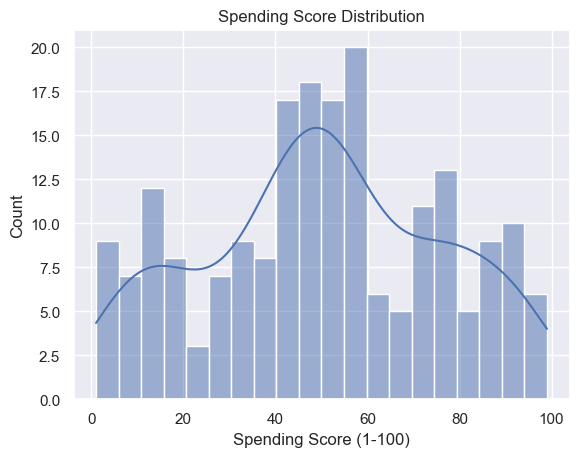

In [9]:
# Spending Score distribution
sns.histplot(customers['Spending Score (1-100)'], bins = 20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

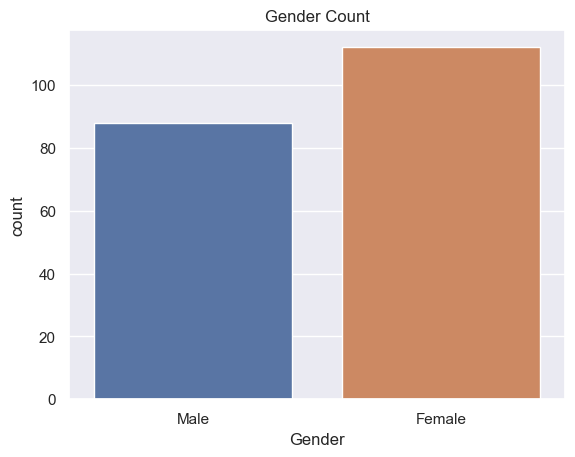

In [10]:
# bar chart of gender

sns.countplot(x=customers['Gender'])
plt.title('Gender Count')
plt.show()

### Scatter plots

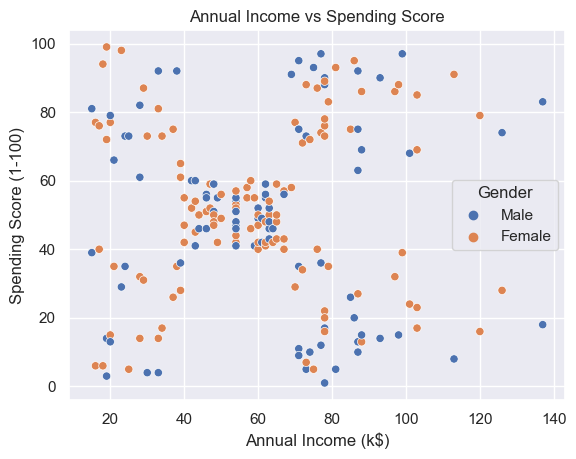

In [11]:
# Scatter plot of Annual Income vs Spending Score
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customers,  hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

Customers with incomes between 40 and 70k have spending scores between 40 and 60. 

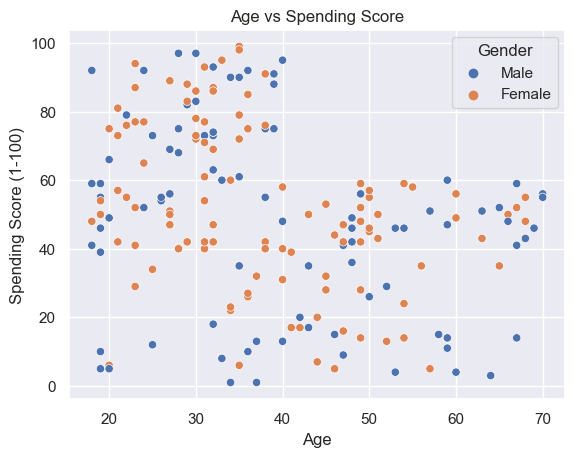

In [12]:
# Scatter plot of Age vs Spending Score
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = customers,  hue='Gender')
plt.title('Age vs Spending Score')
plt.show()

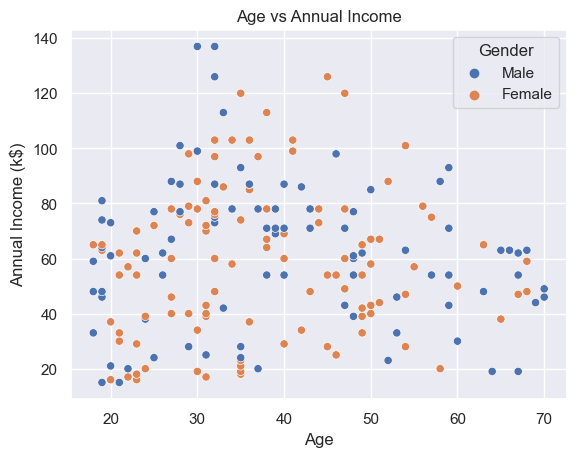

In [13]:
# Scatter plot of Age vs Annual Income
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = customers, hue='Gender')
plt.title('Age vs Annual Income')
plt.show()

### Box plots

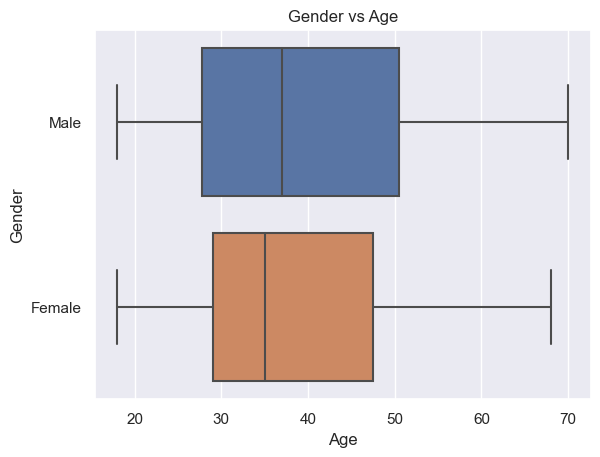

In [14]:
# Boxplot of gender vs age
sns.boxplot(data= customers, x='Age', y='Gender')
plt.title('Gender vs Age')
plt.show()

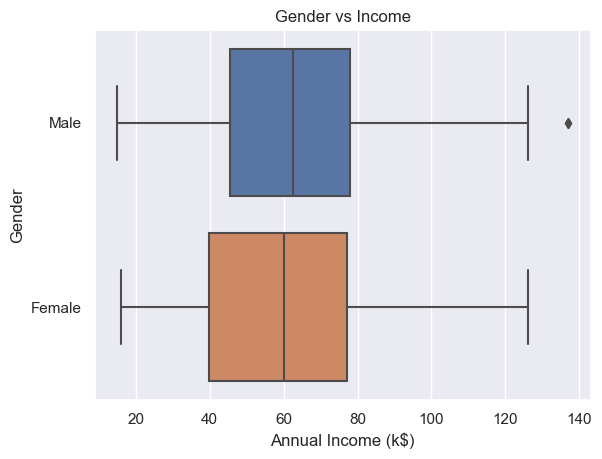

In [15]:
# Boxplot of gender vs income
sns.boxplot(data= customers, x='Annual Income (k$)', y='Gender')
plt.title('Gender vs Income')
plt.show()

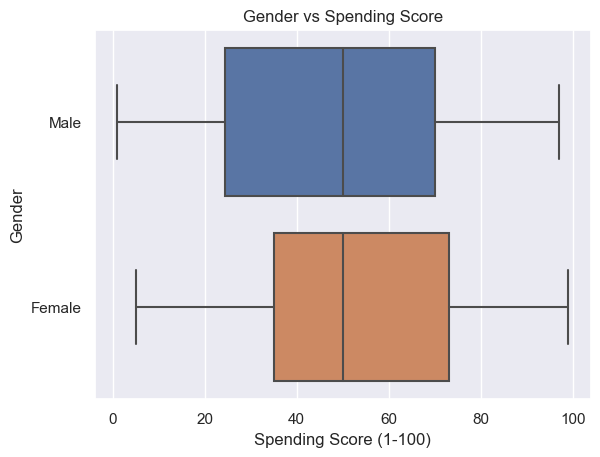

In [16]:
# Boxplot of gender vs spending score
sns.boxplot(data= customers, x='Spending Score (1-100)', y='Gender')
plt.title('Gender vs Spending Score')
plt.show()

### Preprocessing

Remove customer ID and transform gender into binary 

In [17]:
# Romove CustomerID column and replace gender with a boolean column
customers['is_male'] = customers['Gender'] == 'Male'
customers.drop(['CustomerID', 'Gender'], axis = 1, inplace = True)
customers.head(20)

,Age,Annual Income (k$),Spending Score (1-100),is_male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
5,22,17,76,False
6,35,18,6,False
7,23,18,94,False
8,64,19,3,True
9,30,19,72,False


In [18]:
# Scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# drop gender
X = customers.drop('is_male', axis=1).values


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

[[-0.19222109  0.31968276]
 [-0.45817502 -0.01815154]
 [ 0.05256189  0.55185363]
 [-0.40235654 -0.01423909]
 [-0.03164753  0.15557819]]


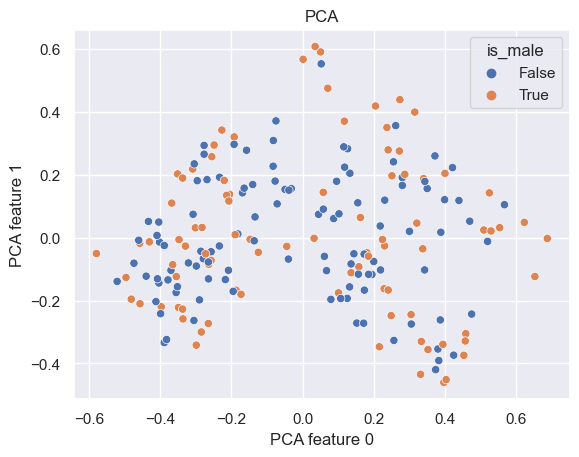

In [19]:
# reduce the dimensionality of the data from 3 to 2
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

print(X_pca[:5])

#plot PCA data
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue=customers['is_male'])
plt.title('PCA')
plt.xlabel('PCA feature 0')
plt.ylabel('PCA feature 1')
plt.show()

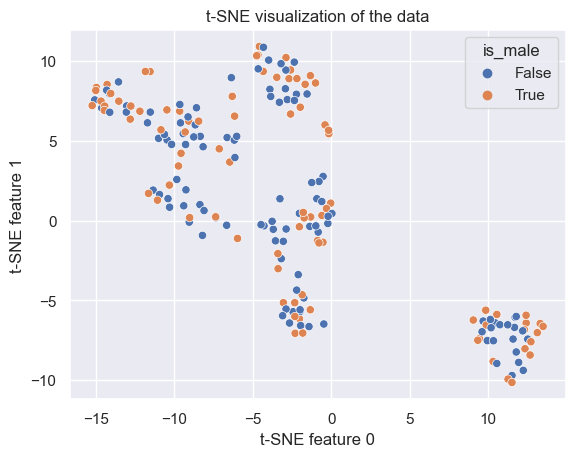

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot TSNE data
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=customers['is_male'])
plt.title('t-SNE visualization of the data')
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.show()

## Task 2: Clustering using K-Means, Hierarchical Clustering and DBSCAN

### K-Means Clustering

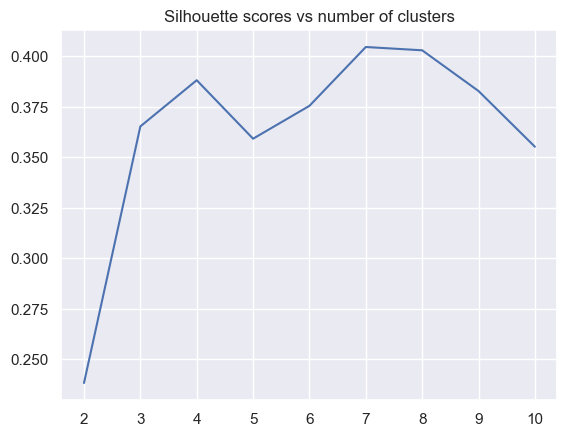

[0.2383142752269864, 0.3653643932262771, 0.3882398111764699, 0.35928519974991213, 0.37555483883456975, 0.4046874563272633, 0.40305631841911355, 0.3828887468864505, 0.35530660309031176]


In [21]:
# determine the optimal number of clusters, based on the silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

range = np.arange(2, 11)

data = X_tsne

for k in range:
    kmeans = KMeans(n_clusters = k, 
                    n_init=10)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.predict(data)))
    
plt.plot(range, silhouette_scores)
plt.title('Silhouette scores vs number of clusters')
plt.show()

print(silhouette_scores)

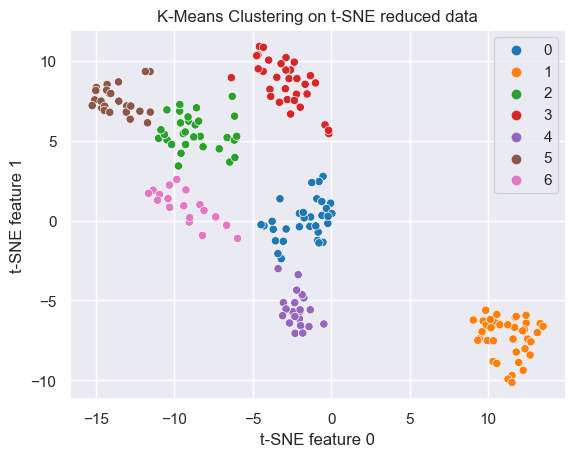

In [22]:
# K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,
                n_init=10,
                random_state=108)

k_labels = kmeans.fit_predict(data)

num_labels = k_labels.max() + 1

sns.set_palette('tab10', num_labels)
sns.scatterplot(x=data[:, 0], 
                y=data[:, 1], 
                hue=k_labels,
                palette=sns.color_palette('tab10', num_labels))
plt.title('K-Means Clustering on t-SNE reduced data')
plt.ylabel('t-SNE feature 1')
plt.xlabel('t-SNE feature 0')
plt.show()

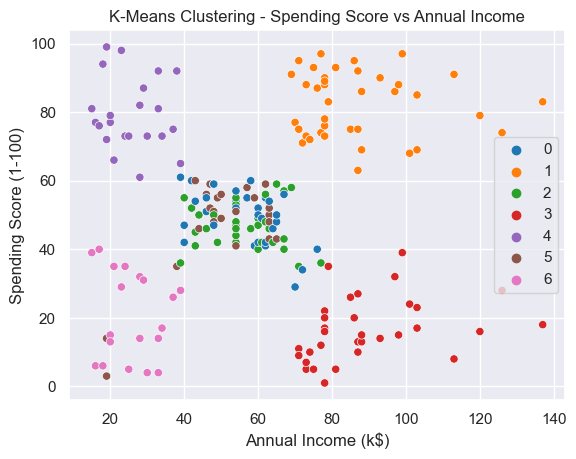

In [23]:
# plot spend and income
sns.scatterplot(x=customers['Annual Income (k$)'], 
                y=customers['Spending Score (1-100)'], 
                hue=k_labels,
                palette=sns.color_palette('tab10', num_labels))
plt.title('K-Means Clustering - Spending Score vs Annual Income')
plt.show()

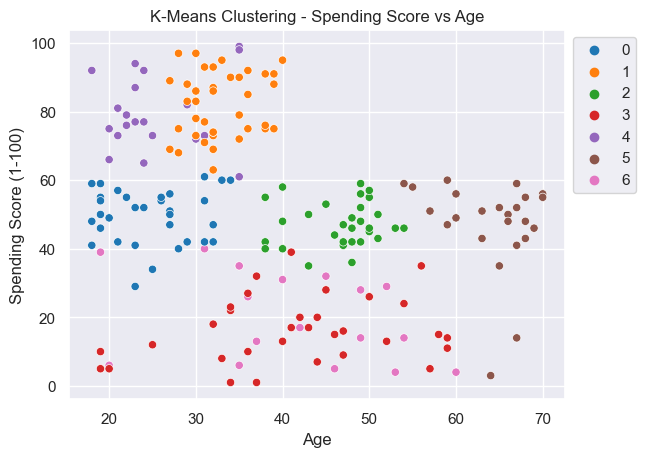

In [24]:
# plot spend and age
ax = sns.scatterplot(x=customers['Age'], 
                y=customers['Spending Score (1-100)'], 
                hue=k_labels,
                palette=sns.color_palette('tab10', num_labels),
                legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('K-Means Clustering - Spending Score vs Age')
plt.show()

### DBSCAN Clustering

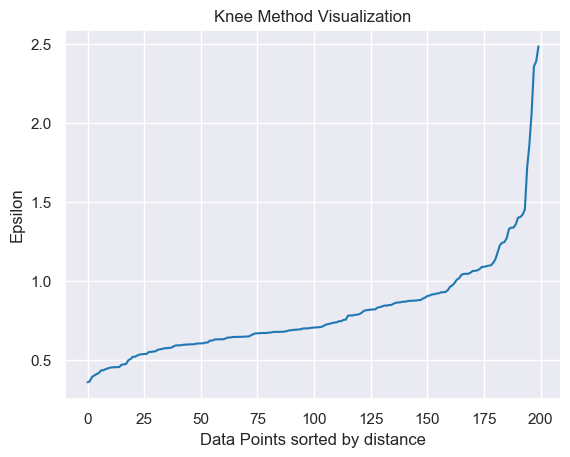

In [25]:
# DBSCAN Knee Method

from sklearn.neighbors import NearestNeighbors

data = X_tsne

neighbors = 4

neigh = NearestNeighbors(n_neighbors=neighbors)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.plot(distances)
plt.title('Knee Method Visualization')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


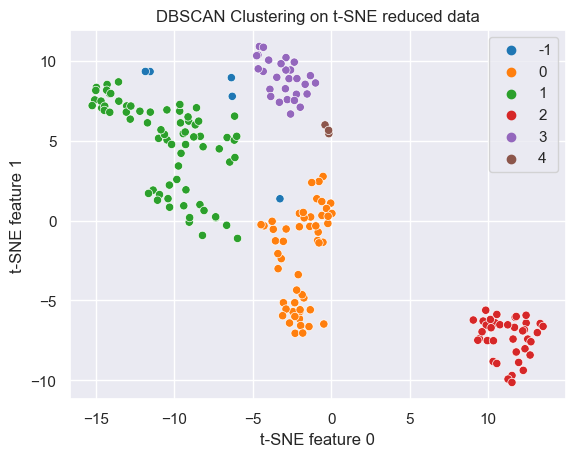

In [26]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

data = X_tsne

clustering = DBSCAN(eps=1.35, min_samples=4)
clustering.fit(data)

db_labels = clustering.labels_

num_clusters = len(set(db_labels))

sns.scatterplot(x=data[:, 0], 
                y=data[:, 1], 
                hue=db_labels,
                palette=sns.color_palette('tab10', num_clusters))

plt.title('DBSCAN Clustering on t-SNE reduced data')
plt.ylabel('t-SNE feature 1')
plt.xlabel('t-SNE feature 0')

plt.show()

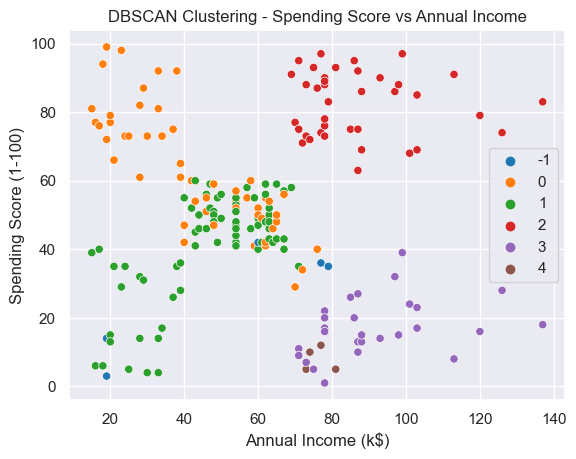

In [27]:
sns.scatterplot(x=customers['Annual Income (k$)'], 
                y=customers['Spending Score (1-100)'], 
                hue=db_labels,
                palette=sns.color_palette('tab10', num_clusters))
plt.title('DBSCAN Clustering - Spending Score vs Annual Income')
plt.show()

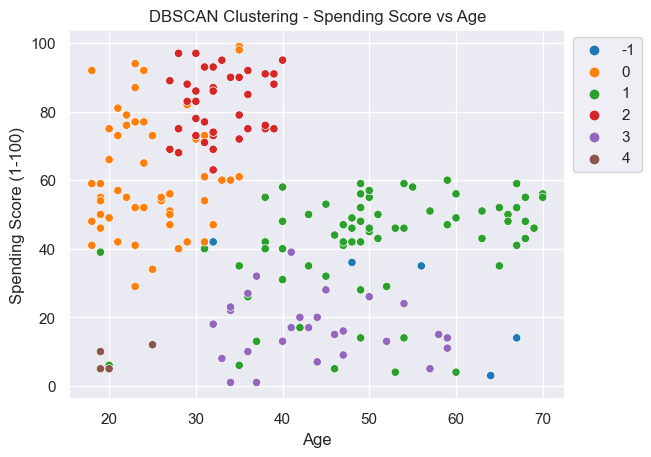

In [28]:
ax = sns.scatterplot(x=customers['Age'], 
                y=customers['Spending Score (1-100)'], 
                hue=db_labels,
                palette=sns.color_palette('tab10', num_clusters),
                legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('DBSCAN Clustering - Spending Score vs Age')
plt.show()

### Hierarchical Clustering

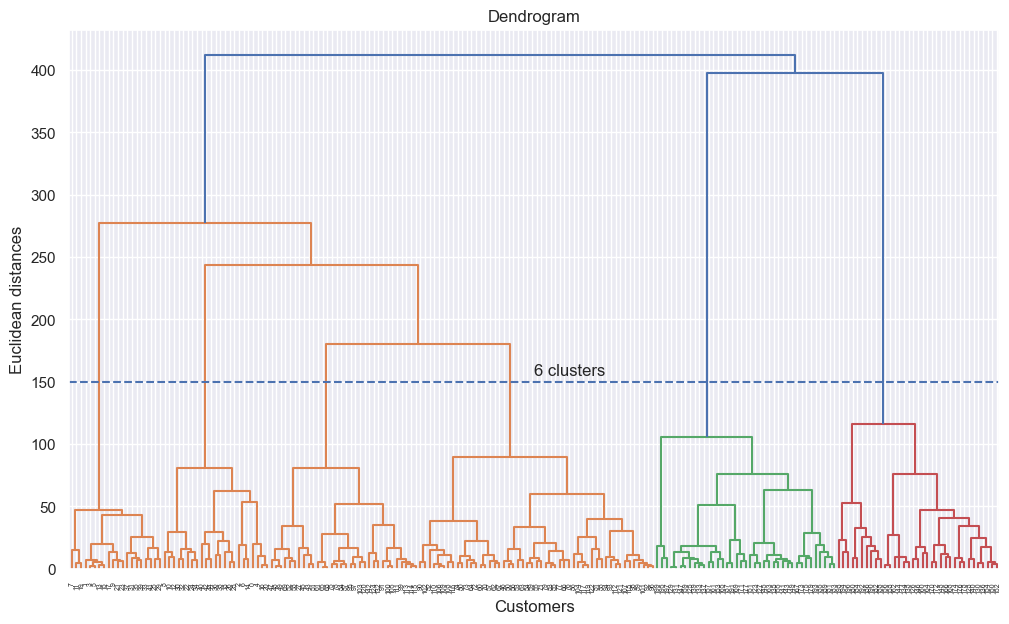

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = customers

mergings = linkage(X, method='ward')

sns.set(rc={'figure.figsize':(12,7)})
dendrogram = dendrogram(mergings)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=150, xmin=0, xmax=2000, colors='b', linestyles='--')
plt.annotate('6 clusters', xy=(2000, 155), xytext=(1000, 155))
plt.show()

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 4 3 4 4 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 4 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
 3 4 3 3 3 4 4 4 4 3 4 4 5 3 5 6 5 6 5 6 5 3 5 6 5 6 5 6 5 6 5 3 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6
 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5]


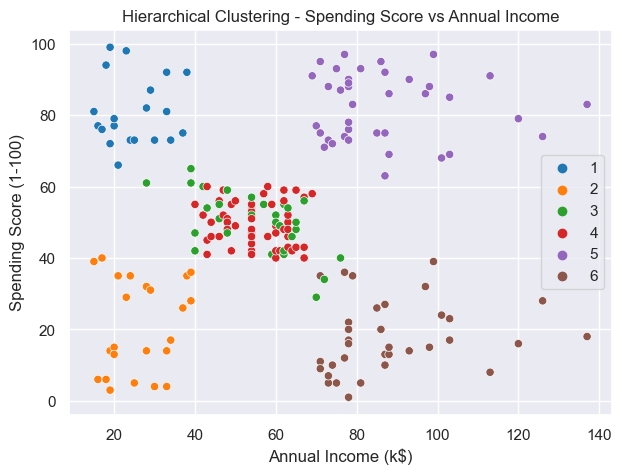

In [30]:
from scipy.cluster.hierarchy import fcluster

h_labels = fcluster(mergings, 150, criterion='distance')
print(h_labels)

num_colours = np.unique(h_labels).shape[0]

sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=customers['Annual Income (k$)'], 
                y=customers['Spending Score (1-100)'], 
                hue=h_labels,
                palette=sns.color_palette('tab10', num_colours))
plt.title('Hierarchical Clustering - Spending Score vs Annual Income')
plt.show()

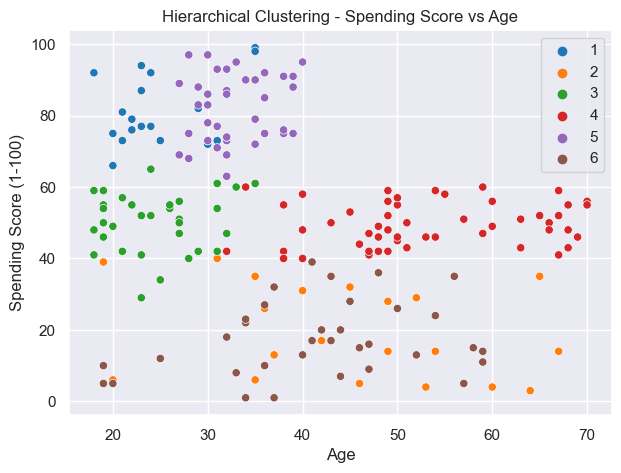

In [31]:
sns.scatterplot(x=customers['Age'], 
                y=customers['Spending Score (1-100)'], 
                hue=h_labels,
                palette=sns.color_palette('tab10', num_colours))
plt.title('Hierarchical Clustering - Spending Score vs Age')
plt.show()

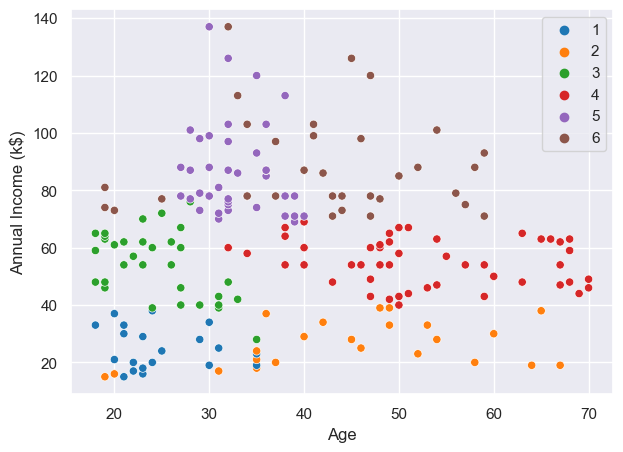

In [32]:
sns.scatterplot(x=customers['Age'], 
                y=customers['Annual Income (k$)'], 
                hue=h_labels,
                palette=sns.color_palette('tab10', num_colours))
plt.show()